## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
dataset = pd.read_csv('../data/Position_Salaries.csv')

X = dataset.iloc[ :, 1 : -1].values
Y = dataset.iloc[ :, -1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(Y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
Y = Y.reshape(len(Y), 1)
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

X_sc = StandardScaler()
Y_sc = StandardScaler()
X = X_sc.fit_transform(X)
Y = Y_sc.fit_transform(Y)

In [7]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [8]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Train SVR model on whole dataset

In [9]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(X, Y)

/opt/anaconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Prediction 

In [10]:
Y_sc.inverse_transform(regressor.predict(X_sc.transform([[6.5]])).reshape(-1 ,1))

array([[170370.0204065]])

## Visualizing SVR 

Text(0, 0.5, 'Salary')

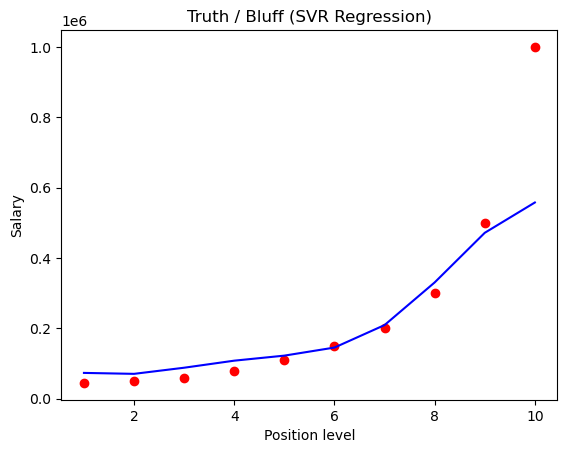

In [11]:
plt.scatter(X_sc.inverse_transform(X), Y_sc.inverse_transform(Y), color = 'red')
plt.plot(X_sc.inverse_transform(X), Y_sc.inverse_transform(regressor.predict(X).reshape(-1 ,1)), color = 'blue')
plt.title('Truth / Bluff (SVR Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')

## Visualizing SVR for higher resolution and smoother curve

/var/folders/km/tf_d4lt54rn1_pt0995j_l600000gn/T/ipykernel_58333/3836343222.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_sc.inverse_transform(X)), max(X_sc.inverse_transform(X)), 0.1)


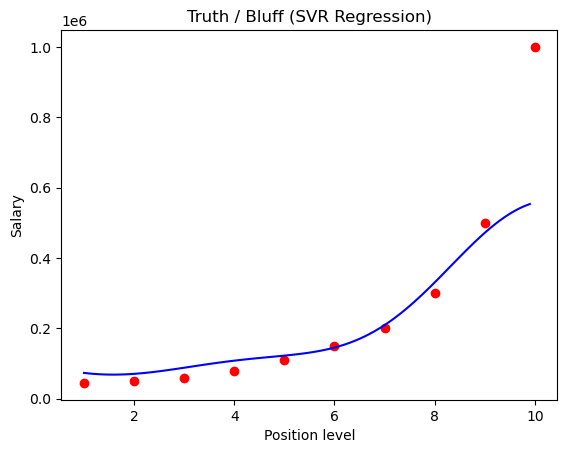

In [14]:
X_grid = np.arange(min(X_sc.inverse_transform(X)), max(X_sc.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_sc.inverse_transform(X), Y_sc.inverse_transform(Y), color = 'red')
plt.plot(X_grid, Y_sc.inverse_transform(regressor.predict(X_sc.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth / Bluff (SVR Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()